
<a href="https://colab.research.google.com/github/kokchun/Databehandling-AI22/blob/main/Exercises/E00_pandas_basic_syntax.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

# pandas fundamentals exercises

---
These are introductory exercises in Pandas with focus in **syntax, DataFrame, indexing, data selection** and **data cleaning**.

<p class = "alert alert-info" role="alert"><b>Note</b> that there are usually many ways to achieve same results using operations in pandas. Feel free to investigate several ways. </p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to format your input questions in a pedagogical way to guide the user

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 1. Cities in Sweden - create dataset (*)

Create this DataFrame from scratch: 

|    | Kommun    |   Population |
|---:|:----------|-------------:|
|  0 | Malmö     |       347949 |
|  1 | Stockholm |       975551 |
|  2 | Uppsala   |       233839 |
|  3 | Göteborg  |       583056 |

&nbsp; a) Use your DataFrame to print out all the cities. (*)

&nbsp; b) Select only the row which contains Göteborg. Do this by using the name Göteborg. (*)

&nbsp; c) Sort the cities by population from largest to smallest. (*)

&nbsp; d) Filter out the three largest cities. (*)

&nbsp; e) The whole population in Sweden 2020 is 10379295. Use this number to create a new column in your sorted DataFrame named: Population (%). This column should be filled with percentage of the Swedish population for each city. 


<details>

<summary>Answer</summary>

a) 

```
0        Malmö
1    Stockholm
2      Uppsala
3     Göteborg
```

b)

|    | Kommun   |   Population |
|---:|:---------|-------------:|
|  3 | Göteborg |       583056 |

c) 

|    | Kommun    |   Population |
|---:|:----------|-------------:|
|  0 | Stockholm |       975551 |
|  1 | Göteborg  |       583056 |
|  2 | Malmö     |       347949 |
|  3 | Uppsala   |       233839 |


d)

|    | Kommun    |   Population |
|---:|:----------|-------------:|
|  0 | Stockholm |       975551 |
|  1 | Göteborg  |       583056 |
|  2 | Malmö     |       347949 |

e)

|    | Kommun    |   Population |   Population (%) |
|---:|:----------|-------------:|-----------------:|
|  0 | Stockholm |       975551 |              9.4 |
|  1 | Göteborg  |       583056 |              5.6 |
|  2 | Malmö     |       347949 |              3.4 |
|  3 | Uppsala   |       233839 |              2.3 |

</details>


In [44]:
# Answer
import pandas as pd
#from IPython.display import display


komun = pd.Series( ["Malmö", "Stockholm", "Uppsala", "Göteborg"] ) 
population = pd.Series( [347949, 975551, 233839, 583056] )
df = pd.DataFrame( {"komun":komun, "population":population})
 # Prints Dataframe
display(df)
# a) Print the Cities
print(df["komun"]) # aPrints the Citeis
# b) Print Göteborg
#print(df.loc["Göteborg"])  
# c) Sort Citeis
display( df.sort_values(by="population", ascending=False) ) 
# d) Filter out the three larges cities 
display( df.sort_values(by="population", ascending=False)[3:] )
# e) Population Percent
# First value is which index it will be slotted in to, 
#second is the name, third the values, fourht I don't know. 
df.insert(2, "Population (%)", round(df["population"]*100/10379295, 2), True)
display(df)

,komun,population
0,Malmö,347949
1,Stockholm,975551
2,Uppsala,233839
3,Göteborg,583056


0        Malmö
1    Stockholm
2      Uppsala
3     Göteborg
Name: komun, dtype: object


,komun,population
1,Stockholm,975551
3,Göteborg,583056
0,Malmö,347949
2,Uppsala,233839


,komun,population
2,Uppsala,233839


,komun,population,Population (%)
0,Malmö,347949,3.35
1,Stockholm,975551,9.40
2,Uppsala,233839,2.25
3,Göteborg,583056,5.62


In [ ]:
# Practice
import pandas as pd
from IPython.display import display


komun = ["Malmö", "Stockholm", "Uppsala", "Göteborg"] 
population = [347949, 975551, 233839, 583056] 
population_tot = 10379295

# Prints Dataframe

# a) Print the Cities

# b) Print Göteborg
#print(df.loc["Göteborg"])  
# c) Sort Citeis

# d) Filter out the three larges cities 

# e) Population Percent
# First value is which index it will be slotted in to, 
#second is the name, third the values, fourht I don't know. 


---

## 2. Cities in Sweden - real dataset (*)

Download the file komtopp50_2020.xlsx from the course github repo. The data is taken from SCB. 

&nbsp; a) Read in the tab "Totalt" into a DataFrame and start exploring the data with some simple explorations such as

```python
df.head()
df.info()
df.describe()
```

Feel free to do more explorations. (*)

&nbsp; b) Clean your data so that the head looks like this: (*)


|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|
|  0 |          83 |          84 | Ale      |            31868 |            31402 |     1.48398  |
|  1 |          64 |          64 | Alingsås |            41602 |            41420 |     0.439401 |
|  2 |         123 |         123 | Alvesta  |            20224 |            20134 |     0.447005 |
|  3 |         255 |         255 | Aneby    |             6821 |             6848 |    -0.394276 |
|  4 |         169 |         167 | Arboga   |            14039 |            14087 |    -0.34074  |

&nbsp; c) Sort the cities by population from largest to smallest. (*)

&nbsp; d) Filter out the five smallest cities. (*)

&nbsp; e) Use the DataFrame to calculate Sweden's population in 2019 and 2020. (*)

&nbsp; f) Plot a bar chart for the five largest cities and the five smallest cities. (*) 

<details>

<summary>Hint</summary>

a) Use
```python
pd.read_excel(path, header = ..., usecols="Letter1:LetterN", sheet_name="...")
```

</details>

<details>

<summary>Answer</summary>

b)

|    | Kommun   |   Population |
|---:|:---------|-------------:|
|  3 | Göteborg |       583056 |

c) 


|    |   Rang 2020 |   Rang 2019 | Kommun    |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring |
|---:|------------:|------------:|:----------|-----------------:|-----------------:|-------------:|
|  0 |           1 |           1 | Stockholm |           975551 |           974073 |     0.151734 |
|  1 |           2 |           2 | Göteborg  |           583056 |           579281 |     0.65167  |
|  2 |           3 |           3 | Malmö     |           347949 |           344166 |     1.09918  |
|  3 |           4 |           4 | Uppsala   |           233839 |           230767 |     1.33121  |
|  4 |           5 |           5 | Linköping |           164616 |           163051 |     0.959822 |


d)

|     |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring |
|----:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|
| 289 |         290 |         290 | Bjurholm |             2387 |             2408 |    -0.872093 |
| 288 |         289 |         289 | Sorsele  |             2442 |             2489 |    -1.88831  |
| 287 |         288 |         288 | Dorotea  |             2498 |             2551 |    -2.07762  |
| 286 |         287 |         287 | Arjeplog |             2718 |             2785 |    -2.40575  |
| 285 |         286 |         286 | Åsele    |             2805 |             2794 |     0.393701 |

e)

```
Populationen i Sverige 2020: 10379295
Populationen i Sverige 2019: 10327589
```

f)

<img align="left" src="../assets/city_sizes.png" height="200"/>

</details>


 Folkmängd 2020 10379295
 Folkmängd 2019 10327589


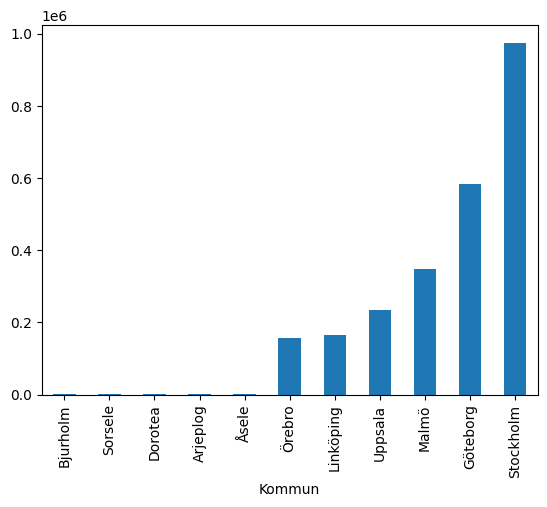

In [130]:
# Answer
import pandas as pd
import matplotlib.pyplot as plt

# a) Read in the tab "Total" from the xlsx file komtopp50_2020 in to a data frame
df = pd.read_excel("../Data/komtopp50_2020.xlsx", sheet_name="Totalt")
# Explore the files using head, info and describe
#df.head()
#df.info()
#df.describe()

# b) Clean up the data 
#df=df[6:]
df = df.drop(index=range(6))
df.index= range(len(df))
# Use inplace=True to modify the Data Frame directly rather
# then returning an alternate version
df.rename(columns={
    "Unnamed: 0":"Rang 2020", 
    "Unnamed: 1":"Rang 2019", 
    "Unnamed: 2":"Kommun", 
    "Unnamed: 3":"Folkmängd 2020", 
    "Unnamed: 4":"Folkmängd 2019", 
    "Unnamed: 5":"Förändring", 
    }, inplace=True)

#column_name = ["Rang"]

# c) Sort the cities by population from largest to smallest
df = df.sort_values(by="Folkmängd 2020", ascending=True)

# d) Filter out the five smalest cities
df[:5]

# e) Calculate Swedens population in 2020 and 2019
print( f" Folkmängd 2020 {df["Folkmängd 2020"].sum()}")
print( f" Folkmängd 2019 {df["Folkmängd 2019"].sum().astype(int)}")

# f) Plott the five smallest and the five larges cities as barcharts
#df["Folkmängd 2020"].plot(kind="hist")

sam = pd.concat([df[:5],df[-6:]])
sam.index=sam["Kommun"]
sam["Folkmängd 2020"].plot(kind="bar")
plt.show()




---

## 3. Cities in Sweden - gender (*)

We continue with the same Excel-file as in task 2, but now you should also read in the sheets "Kvinnor" and "Män" into two additional DataFrames. In this task, many operations are similar to all three datasets, try creating custom made functions to reuse as much code as possible.

&nbsp; a) Clean your data so that the head looks like this: (*)

Male: 

|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön   |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|:------|
|  0 |          81 |          83 | Ale      |            16256 |            16054 |     1.25825  | Man   |
|  1 |          64 |          64 | Alingsås |            20702 |            20646 |     0.271239 | Man   |
|  2 |         122 |         123 | Alvesta  |            10367 |            10339 |     0.270819 | Man   |
|  3 |         255 |         255 | Aneby    |             3503 |             3498 |     0.142939 | Man   |
|  4 |         169 |         168 | Arboga   |             7094 |             7114 |    -0.281136 | Man   |

Female: 

|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön    |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|:-------|
|  0 |          84 |          85 | Ale      |            15612 |            15348 |     1.72009  | Kvinna |
|  1 |          64 |          64 | Alingsås |            20900 |            20774 |     0.606527 | Kvinna |
|  2 |         123 |         123 | Alvesta  |             9857 |             9795 |     0.632976 | Kvinna |
|  3 |         255 |         255 | Aneby    |             3318 |             3350 |    -0.955224 | Kvinna |
|  4 |         165 |         164 | Arboga   |             6945 |             6973 |    -0.401549 | Kvinna |


&nbsp; b) Merge the male and female DataFrames vertically and set index to "Kommun". Note that there now should be 580 rows now.  (*)

|    | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön   |
|---:|:---------|-----------------:|-----------------:|-------------:|:------|
|  0 | Ale      |            16256 |            16054 |     1.25825  | Man   |
|  1 | Alingsås |            20702 |            20646 |     0.271239 | Man   |
|   ...  | ...       | ...  | ...   | ...  | ...    |
| 288 | Överkalix    |             1559 |             1578 |    -1.20406  | Kvinna |
| 289 | Övertorneå   |             2027 |             2065 |    -1.84019  | Kvinna |

&nbsp; c) Extract and change column name from the total DataFrame so that the head look like this: (*) 

|    | Kommun   |   Total Pop 2020 |   Total Pop 2019 |   Total förändring |
|---:|:---------|-----------------:|-----------------:|-------------------:|
|  0 | Ale      |            31868 |            31402 |           1.48398  |
|  1 | Alingsås |            41602 |            41420 |           0.439401 |
|  2 | Alvesta  |            20224 |            20134 |           0.447005 |
|  3 | Aneby    |             6821 |             6848 |          -0.394276 |
|  4 | Arboga   |            14039 |            14087 |          -0.34074  |

&nbsp; d) Merge this data with the data in b) so that the head look like this: (*)

| Kommun    |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön    |   Total Pop 2020 |   Total Pop 2019 |   Total förändring |
|:----------|-----------------:|-----------------:|-------------:|:-------|-----------------:|-----------------:|-------------------:|
| Stockholm |           482982 |           482220 |     0.158019 | Man    |           975551 |           974073 |           0.151734 |
| Stockholm |           492569 |           491853 |     0.145572 | Kvinna |           975551 |           974073 |           0.151734 |
| Göteborg  |           292505 |           290308 |     0.756782 | Man    |           583056 |           579281 |           0.65167  |
| Göteborg  |           290551 |           288973 |     0.546072 | Kvinna |           583056 |           579281 |           0.65167  |
| Malmö     |           175411 |           173543 |     1.07639  | Kvinna |           347949 |           344166 |           1.09918  |

&nbsp; e) Create barplots showing the gender populations of Swedens 10 largest and 10 smallest cities. (*) 
 
&nbsp; f) Create a pie chart showing the total male and female population in Sweden 2020. (*)

&nbsp; g) Create a barplot showing the cities with the five largest percentual gender difference in 2020. (**)

&nbsp; h) Create a barplot showing the top 5 cities with largest populational growth from 2019 to 2020 (**)

&nbsp; i) Feel free to investigate other questions you are interested in using these datasets. (*), (**)

<br/>

<details>

<summary>Hint</summary>

f) You need to process the data first. For example

- compute difference between males and females in 2020
- use this difference to compute the differences in percentage
- sort the values by this percentage difference
- use seaborn barplot to plot, with the gender as hue

</details>

<br/>

<details>

<summary>Answer</summary>

e)

<img src="../assets/population_gender.png" height="200"/>

f)

<img src="../assets/population_genders_pie.png" height="200"/>

g)

<img src="../assets/cities_largest_gender_diff.png" height="200"/>

h)

<img src="../assets/pop_change.png" height="200"/>

</details>


       Folkmängd 2020  Folkmängd 2019 Total Förändring
Kön                                                   
Kvinna        5156448       5131775.0         0.154672
Man           5222847       5195814.0         0.154672


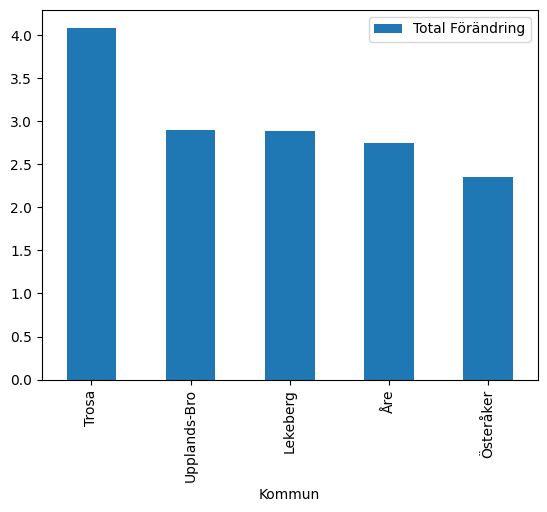

,Kommun,Kvinnor/Män
198,Stockholm,-9587
134,Malmö,-2873
241,Uppsala,-2455
131,Lund,-1407
281,Örebro,-1189
...,...,...
57,Göteborg,1954
130,Luleå,1991
216,Södertälje,2291
20,Botkyrka,2355


In [329]:
# Answer
import pandas as pd
import matplotlib.pyplot as plt

# a) Create a function that will clean the two tabs 

def read_and_clean(tab:str, rename_columns:dict):
    df = pd.read_excel("../Data/komtopp50_2020.xlsx", sheet_name=tab)
    df = df.drop(index=range(6))
    df.index= range(len(df))
    df.rename(columns=rename_columns, inplace=True)
    
    return df 

# Create the two dataframe from the tabs Män and Kvinnor
rc = {
    "Unnamed: 0":"Rang 2020", 
    "Unnamed: 1":"Rang 2019", 
    "Unnamed: 2":"Kommun", 
    "Unnamed: 3":"Folkmängd 2020", 
    "Unnamed: 4":"Folkmängd 2019", 
    "Unnamed: 5":"Förändring", 
    }
df_man = read_and_clean("Män", rc)
df_kvinnor = read_and_clean("Kvinnor", rc)

# Insert an extra komum Kön with the value Man or Kvinna
df_man.insert(6, "Kön", "Man", True)
df_kvinnor.insert(6, "Kön", "Kvinna", True)

# b) Merge the two data frames, the left should be 580
df_personer = pd.concat([df_man, df_kvinnor])

# c) Create a new dataframe from Totalt
rc = {
    "Unnamed: 0":"Rang 2020", 
    "Unnamed: 1":"Rang 2019", 
    "Unnamed: 2":"Kommun", 
    "Unnamed: 3":"Total Pop 2020",
    "Unnamed: 4":"Total Pop 2019", 
    "Unnamed: 5":"Total Förändring", 
}
df_totalt = read_and_clean("Totalt", rc)

# Remove "Rang 2020","Rang 2019"
df_totalt.drop(columns=["Rang 2020", "Rang 2019"], inplace=True)


# d) Merge df_totalt with df_personer 
df_personer = df_personer.merge(df_totalt, on="Kommun", how="inner")
df_personer = df_personer.sort_values( by="Kommun", ascending=True)
df_personer.drop(columns=["Rang 2020", "Rang 2019"], inplace=True)
df_personer.index=range(len(df_personer))
# e) Create a bar plot showing the genders population in Swedens top 10 largest and smallets cities
#df_personer[:5][["Folkmängd 2020", "Folkmängd 2019"]].plot( kind="bar")

#pd.concat([df_personer.head(),df_personer.tail()]).plot.bar(y=["Folkmängd 2020", "Folkmängd 2019"], x="Kommun" )

#plt.show()

#f)
#df_personer[["Folkmängds 2020", "Folkmängd 2019"]].sum().plot( kind="pie",  )
df_pie = pd.DataFrame()
se_man = df_personer[ df_personer["Kön"] == "Man" ]["Folkmängd 2020"].sum() 
se_kvinnor = df_personer[ df_personer["Kön"] == "Kvinna" ]["Folkmängd 2020"].sum()
df_pie.insert(0, "Pop", [ se_man, se_kvinnor ], True )
df_pie.index=["Man","Kvinna"]
#df_pie.plot( kind="pie", y="Pop" )
#df_personer["Kön","Folkmängd 2020"].groupby(["Kön"]).sum().plot(
#    kind='pie', y="Folkmängd 2020"
#)
df_personer
#df_personer[["Kön","Folkmängd 2020"]].groupby(["Kön"]).sum().plot(
#    kind='pie', y="Folkmängd 2020")

#print( df_personer.groupby("Kön")["Folkmängd 2020"].sum())
print(
df_personer.groupby("Kön").agg({'Folkmängd 2020': 'sum', 'Folkmängd 2019': 'sum', 'Total Förändring': 'mean'})
#df_personer.groupby("Kommun").agg({'Folkmängd 2020': 'sum', 'Folkmängd 2019': 'sum', 'Total Förändring': 'mean'})
)

#g)
"""
li = list()
for idx, row in df_personer.iterrows():
    if row["Kön"] == "Kvinna":
        dif = row["Folkmängd 2020"] / row["Total Pop 2020"]
        li.append( (abs(dif), dif, idx, row["Kommun"]) )
li.sort()
li=li[:5]
df_personer.loc[df_personer.index[ [val[2] for val in li] ]]
plt.bar( 
    [val[3] for val in li],
    [val[1] for val in li])
plt.show()
"""

#h) 
#df_personer[df_personer["Folkmängd 2020"]-df_personer["Folkmängd 2019"] > ]
#df_personer.loc[ (df_personer["Total Pop 2020"]-df_personer["Total Pop 2019"]).sort_values( ascending=False).index  ][:10:2].plot(kind="bar",x="Kommun",y="Total Pop 2020")
#df_growth = df_personer.loc[ (df_personer["Total Pop 2020"]-df_personer["Total Pop 2019"]).sort_values( ascending=False).index  ][:10:2]
df_personer.sort_values(by="Total Förändring", ascending=False)[:10:2].plot(kind="bar", x="Kommun", y="Total Förändring")
plt.show()
#df.loc[(df.A * df.B).sort_values().index]

#i) 
dfp = pd.DataFrame()
dfp.insert(0, "Kommun", df_man["Kommun"], True)
dfp.insert(1, "Kvinnor/Män", df_man["Folkmängd 2020"]-df_kvinnor["Folkmängd 2020"], True)
dfp = dfp.sort_values(by="Kvinnor/Män", ascending=True)
dfp

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---